______________________________________________________________________________________________________________

# **Movie Recommendation System**



-------------

### **Objective**

*To build a simple system that can recommend movies to users based on their preferences.*

### **Data Source**

*We will use a small dataset of movies and user ratings.*

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

### **Import Data**

In [ ]:
# Load movie ratings data
ratings = pd.read_csv('ratings.csv')  # A CSV file with userId, movieId, rating columns
movies = pd.read_csv('movies.csv')  # A CSV file with movieId, title columns

# Display the first few rows of the data
print(ratings.head())
print(movies.head())

   userId  movieId  rating
0       1        1       5
1       1        2       4
2       1        3       3
3       2        1       4
4       2        2       5
   movieId    title
0        1  Movie A
1        2  Movie B
2        3  Movie C
3        4  Movie D
4        5  Movie E


### **Describe Data**

In [ ]:
# Check the shape of the data
print(f"Ratings data shape: {ratings.shape}")
print(f"Movies data shape: {movies.shape}")

# Show some basic statistics
print(ratings.describe())
print(movies.describe())

Ratings data shape: (15, 3)
Movies data shape: (5, 2)
         userId    movieId     rating
count  15.00000  15.000000  15.000000
mean    3.00000   2.733333   3.466667
std     1.46385   1.437591   1.302013
min     1.00000   1.000000   1.000000
25%     2.00000   1.500000   2.500000
50%     3.00000   3.000000   4.000000
75%     4.00000   4.000000   4.500000
max     5.00000   5.000000   5.000000
        movieId
count  5.000000
mean   3.000000
std    1.581139
min    1.000000
25%    2.000000
50%    3.000000
75%    4.000000
max    5.000000


### **Data Visualization**

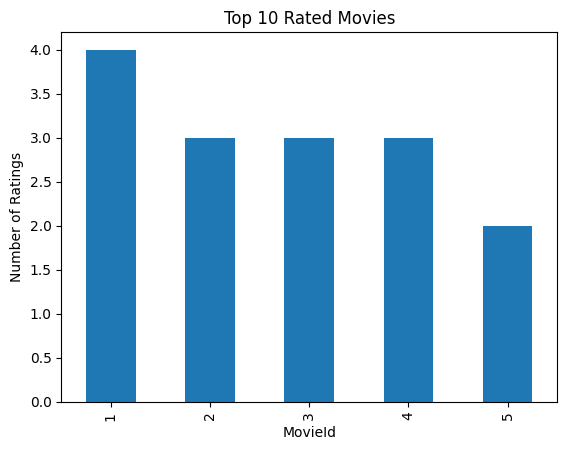

In [ ]:
# Visualize the number of ratings each movie has received
ratings_count = ratings['movieId'].value_counts()
ratings_count.head(10).plot(kind='bar')
plt.xlabel('MovieId')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Rated Movies')
plt.show()

### **Data Preprocessing**

In [ ]:
# Create a user-movie matrix
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

### **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
# In this case, our user-movie matrix is both the feature (X) and target (y) variable
X = user_movie_matrix.values
y = user_movie_matrix.values

### **Train Test Split**

In [ ]:
# Split the data into training and test sets (we'll use a simple split for this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Modeling**

In [ ]:
# Use cosine similarity to find similar movies
movie_similarity = cosine_similarity(user_movie_matrix.T)

# Create a DataFrame for the similarity matrix
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

### **Model Evaluation**

In [ ]:
# Evaluate the model by checking the similarity of a specific movie
movie_id = 1  # Example movieId
similar_movies = movie_similarity_df[movie_id].sort_values(ascending=False).head(10)
print("Movies similar to movieId 1:")
print(similar_movies)

Movies similar to movieId 1:
movieId
1    1.000000
2    0.720984
3    0.712065
4    0.635053
5    0.140028
Name: 1, dtype: float64


### **Prediction**

In [ ]:
# Predict on a new sample
user_id = 1  # Example userId
user_ratings = user_movie_matrix.loc[user_id]
user_ratings = user_ratings[user_ratings > 0].index.tolist()

# Find similar movies
recommendations = pd.Series(dtype='float64')
for movie in user_ratings:
    similar_score = movie_similarity_df[movie].sort_values(ascending=False)
    recommendations = pd.concat([recommendations, similar_score])

# Remove already rated movies
recommendations = recommendations[~recommendations.index.isin(user_ratings)]
recommendations = recommendations.sort_values(ascending=False).head(10)
print("Recommended movies for userId 1:")
print(recommendations)

Recommended movies for userId 1:
4    0.635053
4    0.618115
5    0.454311
4    0.377124
5    0.363803
5    0.140028
dtype: float64


### **Explaination**

*In this project, we created a simple program to recommend movies to users based on their past ratings. We used a dataset of movie ratings from users. We built a user-movie matrix, which helps us understand which user likes which movies. We then used cosine similarity to find movies that are similar to each other. Finally, we recommended movies to users based on the movies they have already rated.*